In [2]:
import csv
mapping_file = open('small_mapping.csv', encoding='utf-8')
file_reader = csv.reader(mapping_file)
mapping_data = list(file_reader)
mapping_file.close()
header = mapping_data[0]
mapping_data = mapping_data[1:]
 

In [3]:
import csv
# copied from https://automatetheboringstuff.com/chapter14/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [4]:
##Movies
import csv
_mapping_file = open('movies.csv', encoding='utf-8')
_file_reader = csv.reader(_mapping_file)
movies_mapping_data = list(_file_reader)
_mapping_file.close()
movies_header = movies_mapping_data[0]
movies_data = movies_mapping_data[1:]

In [5]:
##Smallmovies
csv_list = process_csv("small_movies.csv")
sm_header = csv_list[0]
sm_data = csv_list[1:]
m_dic = {}

In [6]:
def sort_strip(word):
    cut = word.replace(" ","").lower()
    sort = sorted(cut)
    return sort
def cell(row_idx, col_name):
    col_idx = header.index(col_name)
    val = mapping_data[row_idx][col_idx]
    return val

In [7]:
#q1
def get_mapping(path):
    davis = process_csv(path)
    if path == "small_mapping.csv":
        mydict = dict((rows[0],rows[1]) for rows in davis)
        return mydict
    elif path == "mapping.csv":
        mapping_csv_dict = dict((rows[0],rows[1]) for rows in davis) 
        return mapping_csv_dict
    
x = get_mapping("small_mapping.csv")
y = get_mapping("movies.csv")
get_mapping("small_mapping.csv")


{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [8]:
#q2
mapping_value = x.get("nm0752751")
mapping_value

'Mitchell Ryan'

In [9]:
#q3
nm_list = []
for key, value in x.items():
    if "nm" in key:
        nm_list.append(value)
nm_list

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [10]:
#q4
value_list = []
for key, value in x.items():
    if "Gary" in value:
        value_list.append(key)
value_list

['nm0000997', 'nm0001219']

In [11]:
movies_mapping = []
for mapp in movies_data:
    movies_mapping_dic = {}
    movies_mapping_list = []                       
    for header in movies_header:
        if movies_header[movies_header.index(header)] == 'title':
            movies_mapping_list = (mapp[movies_header.index(header)]) 
        elif movies_header[movies_header.index(header)] == 'year':
            movies_mapping_list = int(mapp[movies_header.index(header)])
        elif movies_header[movies_header.index(header)] == 'rating':
            movies_mapping_list = float(mapp[movies_header.index(header)])
        else: 
            movies_mapping_list = mapp[movies_header.index(header)].split(',')
        movies_mapping_dic[header] = movies_mapping_list
    movies_mapping.append(movies_mapping_dic)

In [12]:
mapping = []
for mapp in sm_data:
    mapping_dic = {}
    mapping_list = []                       
    for header in sm_header:
        if sm_header[sm_header.index(header)] == 'title':
            mapping_list = (mapp[sm_header.index(header)]) 
        elif sm_header[sm_header.index(header)] == 'year':
            mapping_list = int(mapp[sm_header.index(header)])
        elif sm_header[sm_header.index(header)] == 'rating':
            mapping_list = float(mapp[sm_header.index(header)])
        else: 
            mapping_list = mapp[sm_header.index(header)].split(',')
        mapping_dic[header] = mapping_list
    mapping.append(mapping_dic)

In [13]:
#q5
def get_raw_movies(path):
    if path == 'small_movies.csv':
        return mapping
    elif path == "movies.csv":
        return movies_mapping
    else: 
        pass
q8 = get_raw_movies('small_movies.csv')
get_raw_movies('small_movies.csv')

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [14]:
#q6 
x = mapping[0]["genres"]
total = 0
for i in x:
    total = total + 1 
total  

3

In [15]:
#q7
last_id = mapping[1]["actors"][-1]
last_id

'nm0752751'

In [16]:
#q8
def get_movies(movies_path="small_movies.csv", mapping_path="small_mappings.csv"):
    movies = get_raw_movies(movies_path)
    mappings = get_mapping(mapping_path)
    for a_movie in movies:
        a_movie["title"] = mappings[a_movie["title"]]
        for i in range(len(a_movie["directors"])):
            a_movie["directors"][i] = mappings[a_movie["directors"][i]]
        for j in range(len(a_movie["actors"])):
            a_movie["actors"][j] = mappings[a_movie["actors"][j]]       
    return movies

small = get_movies("small_movies.csv", "small_mapping.csv")
small[0]["title"]

'Runaway Jury'

In [17]:
#q9
small[1]["actors"]


['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [18]:
#q10
small[-1]["directors"]

['Richard Donner']

In [19]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [20]:
#q12
x = get_movies("movies.csv", "mapping.csv")
x[:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [21]:
import copy 
copied_x = copy.deepcopy(x)
deep_copied_x = copy.deepcopy(x)

In [22]:
#q13
x[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [23]:
#q14
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies
filter_movies_by_year(copied_x, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [24]:
#q15
filter_movies_by_year(deep_copied_x, 1932)

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [25]:
#q16
def unique_something(unique_attribute):
    unique_list = []
    for i in x:
        for attribute in i[unique_attribute]:
            unique_list.append(attribute)
    unique_set = set(unique_list)
    len_unique_set = len(unique_set)
    return len_unique_set
               
unique_genres = unique_something("genres")
unique_genres

18

In [26]:
#q17
unique_actors = unique_something("directors")
unique_actors

1247

In [27]:
#q18 
def most_actors(movie_set, actors_key):
    most_actors = 0 
    actor_list = []
    for i in movie_set:
        act_list = []
        for j in i[actors_key]:
            act_list.append(j)
        actor_list.append(act_list)
    return max(act_list["actors"])
most_actors(x, "actors")

In [28]:
#q19
def average_movie_rating():
    rating = 0
    count = 0
    for key in movies_mapping:
        rating += key["rating"]
        count = count + 1
    average = rating / count
    return average
average = average_movie_rating()
average

6.401659528907912

In [29]:
#q20
def longest_movie(): 
    max_lng = 0
    max_t = ""
    for movie in movies_mapping:
        title_length = 0
        for i in movie["title"]:
            title_length = title_length + 1
            if title_length > max_lng:
                max_lng = title_length
                max_t = movie["title"]
    return max_t
    
longest_movie = longest_movie()
longest_movie

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [30]:
def bucketize(movies_list, movie_key):
    ##dictionary
    bucketize_dic = {}
    for movie in movies_list:
        if type(movie[movie_key]) != list:
            value = movie[movie_key]
            if value in bucketize_dic:
                bucketize_dic[value].append(movie)
            else:
                bucketize_dic[value] = []
                bucketize_dic[value].append(movie)
        else:
            for i in movie[movie_key]:
                if i in bucketize_dic:
                    bucketize_dic[i].append(movie)
                else:
                    bucketize_dic[i] = []
                    bucketize_dic[i].append(movie)
    return bucketize_dic

In [31]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [32]:
#q21
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [35]:
#q24 
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [36]:
#q25 
len(bucketize(small, "actors"))

7

In [37]:
#q26 
len(bucketize(movies_mapping, "actors"))

2605

In [38]:
#q27
dict_count = {}
bucketized_genres = bucketize(movies_mapping, "genres")
for i in bucketized_genres:
    dict_count[i] = len(bucketized_genres[i])
dict_count    

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [39]:
import matplotlib, pandas

%matplotlib inline

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

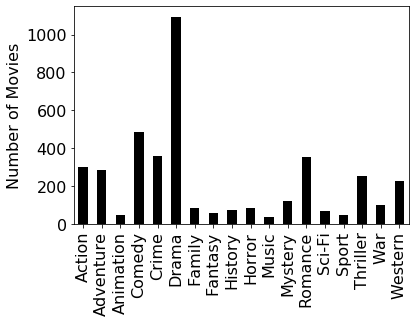

In [40]:
#q28 
d = dict_count
plot_dict(d, "Number of Movies")

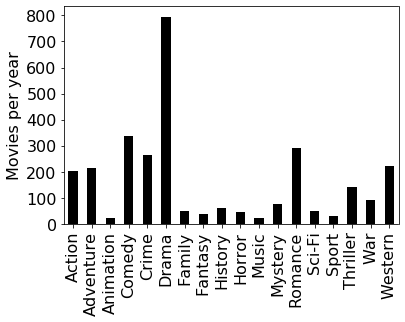

In [41]:
#q29

pre_2000_dict = {}

def genres_before():
    bucket_movies = bucketize(movies_mapping, "genres")
    for genre in bucket_movies:
        pre_2000_dict[genre] = 0
        for a_movie in bucket_movies[genre]:
            if a_movie['year'] < 2000:
                pre_2000_dict[genre] += 1 
    return pre_2000_dict

pre_2000 = genres_before()       

plot_dict(pre_2000, "Movies per year")

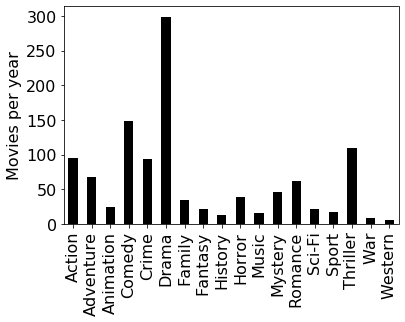

In [42]:
#q30

post_2000_dict = {}

def genres_before():
    bucket_movies = bucketize(movies_mapping, "genres")
    for genre in bucket_movies:
        post_2000_dict[genre] = 0
        for a_movie in bucket_movies[genre]:
            if a_movie['year'] >= 2000:
                post_2000_dict[genre] += 1 
    return post_2000_dict

post_2000 = genres_before()       

plot_dict(post_2000, "Movies per year")

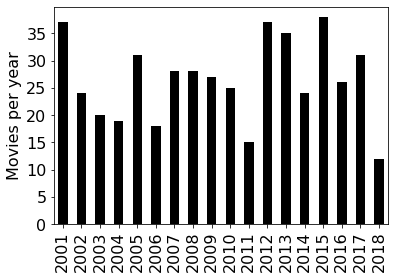

In [43]:
#q31
movies_count_post_2000 = {}

def movies_post():
    bucket_years = bucketize(movies_mapping, "year")
    for year in bucket_years:
        if year > 2000:
            movies_count_post_2000[year] = len(bucket_years[year])
    return movies_count_post_2000 
        
years = movies_post()     
plot_dict(years, "Movies per year")

In [44]:
#q32
#answer with a dictionary 
dicretors_over30_dict = {}
actors_atleast50_dict ={}
dicretors_over30_bucket = bucketize(movies_mapping, "directors")
actors_atleast50_bucket = bucketize(movies_mapping, "actors")
def f(keyward, time):
    if keyward == "director":
        for d in dicretors_over30_bucket:
            d_info = dicretors_over30_bucket[d]
            years_long = []
            for m in d_info:
                years_long.append(m['year'])
            if max(years_long) - min(years_long) >= time:
                dicretors_over30_dict[d] = max(years_long) - min(years_long)
        return dicretors_over30_dict
    
    elif keyward == "actors":
        for a in actors_atleast50_dict:
            a_info = actors_atleast50_bucket[a]
            years_length = []
            for y in a_info:
                years_length.append(y['year'])
            if max(years_length) - min(years_length) >= time:
                actors_atleast50_dict[a] = max(years_length) - min(years_length)
        return actors_atleast50_dict

f("director", 30)      

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [45]:
#q33
dicretors_over30_dict = {}
actors_atleast50_dict = {}
dicretors_over30_bucket = bucketize(movies_mapping, "directors")
actors_atleast50_bucket = bucketize(movies_mapping, "actors")
def f(keyward, time):
    if keyward == "director":
        for d in dicretors_over30_bucket:
            d_info = dicretors_over30_bucket[d]
            years_long = []
            for m in d_info:
                years_long.append(m['year'])
            if max(years_long) - min(years_long) >= time:
                dicretors_over30_dict[d] = max(years_long) - min(years_long)
        return dicretors_over30_dict
    else: 
        for a in actors_atleast50_bucket:
            a_info = actors_atleast50_bucket[a]
            years_length = []
            for y in a_info:
                years_length.append(y['year'])
            if max(years_length) - min(years_length) >= time:
                actors_atleast50_dict[a] = max(years_length) - min(years_length)
        return actors_atleast50_dict

        
f("actors", 50)

{'Kurt Russell': 50,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Glenn Ford': 52,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'George Burns': 60,
 'Dean Stockwell': 53}

In [46]:
#q34
buckets_q_34 = bucketize(movies_mapping, "directors")
buckets_q_35 = bucketize(movies_mapping, "actors")
def row_ranking(row):
    return row["span"]
def top_n_span(buckets, n):
    spans = {}
    #forloop??? 
    for bucket_key in buckets:
        ttl = buckets[bucket_key]
        spanned_years = []
        for i in ttl:
            spanned_years.append(i['year'])
            spans[bucket_key] = max(spanned_years) - min(spanned_years)
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})
    rows.sort(key=row_ranking, reverse=True)
    return rows[:n]
top_n_span(buckets_q_34, 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [47]:
#q35
top_n_span(buckets_q_35, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [48]:
#q36
def row_ranking(row):
    return row["rating"]
def top_rated(bucket, number, min_n=0):
    d_ratings = {}
    d_counts = {}
    for key in bucket:
        options = bucket[key]
        total_rating = []
        for movie in options:
            total_rating.append(movie['rating'])   
        n = len(total_rating)
        if n >= min_n:
            total_rating.sort()
            if n % 2 == 0:
                median = (total_rating[n//2-1]+total_rating[n//2])/2
            else:
                median = total_rating[n//2]
            d_ratings[key] = median
            d_counts[key] = n    
        rows = []
        for cat in d_ratings:
            median = d_ratings[cat]
            n = d_counts[cat]
            rows.append({"category": cat, "rating": median, "count": n})
        rows.sort(key=row_ranking, reverse=True)
    return rows[:number]
q36 = bucketize(movies_mapping, "genres")
q37 = bucketize(movies_mapping, "year")
q38 = bucketize(movies_mapping, "year")
q39 = bucketize(movies_mapping, "directors")
q40 = bucketize(movies_mapping, "actors")
top_rated(q36, 3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [49]:
#q37
top_rated(q37, 10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [50]:
#q38
top_rated(q38, 5, 10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [51]:
#q39
top_rated(q39, 4, 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7}]

In [52]:
#q40
top_rated(q40, 3, 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]